# Demonstrating vector,dataframe and array data structures

In [ ]:
# R program to illustrate dataframe

# A vector which is a character vector
Name = c("Amiya", "Raj", "Asish")

# A vector which is a character vector
Language = c("R", "Python", "Java")

# A vector which is a numeric vector
Age = c(22, 25, 45)

# Created dataframe using data.frame command
df = data.frame(Name, Language, Age)

print(df)


   Name Language Age
1 Amiya        R  22
2   Raj   Python  25
3 Asish     Java  45


In [ ]:
#Creating array of 2x3 dimensions
a = array(c(10,20,30,40,50),dim = c(2,3,1))

In [ ]:
print(a)

, , 1

     [,1] [,2] [,3]
[1,]   10   30   50
[2,]   20   40   10



# Linear Regression Implementation

weight,size
<dbl>,<dbl>
0.9,1.4
1.8,2.6
2.4,1.0
3.5,3.7
3.9,5.5
4.4,3.2
5.1,3.0
5.6,4.9
6.3,6.3



Call:
lm(formula = size ~ weight, data = mouse.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5482 -0.8037  0.1186  0.6186  1.8852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   0.5813     0.9647   0.603   0.5658  
weight        0.7778     0.2334   3.332   0.0126 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.19 on 7 degrees of freedom
Multiple R-squared:  0.6133,	Adjusted R-squared:  0.558 
F-statistic:  11.1 on 1 and 7 DF,  p-value: 0.01256


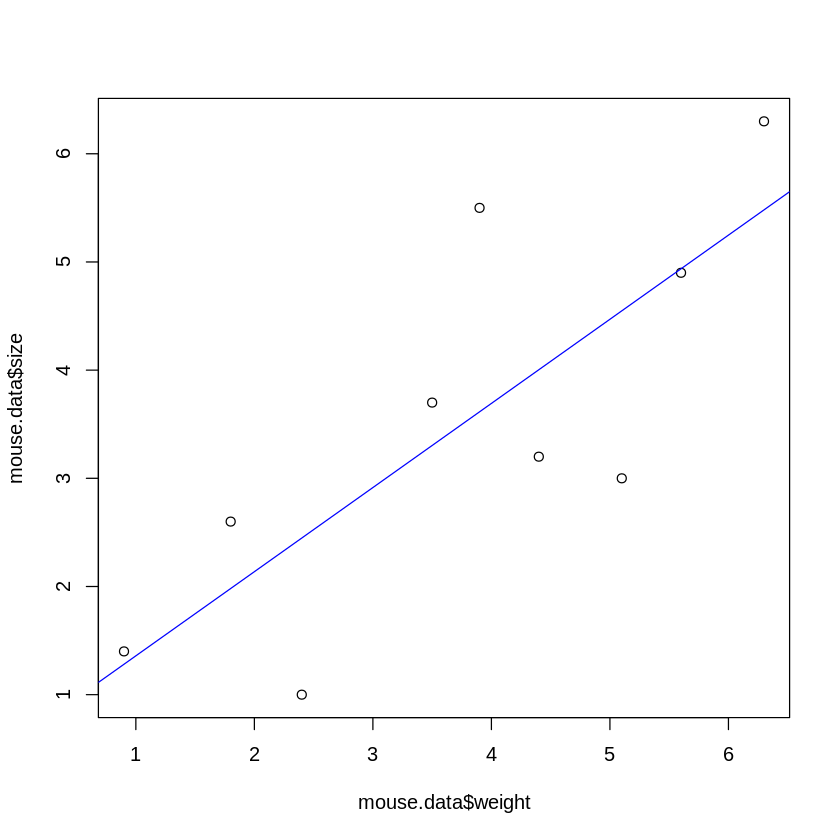

In [ ]:
mouse.data <- data.frame(
  weight=c(0.9, 1.8, 2.4, 3.5, 3.9, 4.4, 5.1, 5.6, 6.3),
  size=c(1.4, 2.6, 1.0, 3.7, 5.5, 3.2, 3.0, 4.9, 6.3))

mouse.data # print the data to the screen in a nice format

## plot a x/y scatter plot with the data
plot(mouse.data$weight, mouse.data$size)

## create a "linear model" - that is, do the regression
mouse.regression <- lm(size ~ weight, data=mouse.data)
## generate a summary of the regression
summary(mouse.regression)

## add the regression line to our x/y scatter plot
abline(mouse.regression, col="blue")

# Logistic Regression Implementation

In [ ]:
library(ggplot2)
library(cowplot)

## dataset is from UCI machine repository.
url <- "https://raw.githubusercontent.com/StatQuest/logistic_regression_demo/master/processed.cleveland.data"

data <- read.csv(url, header=FALSE)

head(data) # you see data, but no column names


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [ ]:
nrow(data)

[1] 303

In [ ]:
colnames(data) <- c(
  "age",
  "sex",# 0 = female, 1 = male
  "cp", # chest pain
  # 1 = typical angina,
  # 2 = atypical angina,
  # 3 = non-anginal pain,
  # 4 = asymptomatic
  "trestbps", # resting blood pressure (in mm Hg)
  "chol", # serum cholestoral in mg/dl
  "fbs",  # fasting blood sugar if less than 120 mg/dl, 1 = TRUE, 0 = FALSE
  "restecg", # resting electrocardiographic results
  # 1 = normal
  # 2 = having ST-T wave abnormality
  # 3 = showing probable or definite left ventricular hypertrophy
  "thalach", # maximum heart rate achieved
  "exang",   # exercise induced angina, 1 = yes, 0 = no
  "oldpeak", # ST depression induced by exercise relative to rest
  "slope", # the slope of the peak exercise ST segment
  # 1 = upsloping
  # 2 = flat
  # 3 = downsloping
  "ca", # number of major vessels (0-3) colored by fluoroscopy
  "thal", # this is short of thalium heart scan
  # 3 = normal (no cold spots)
  # 6 = fixed defect (cold spots during rest and exercise)
  # 7 = reversible defect (when cold spots only appear during exercise)
  "hd" # (the predicted attribute) - diagnosis of heart disease
  # 0 if less than or equal to 50% diameter narrowing
  # 1 if greater than 50% diameter narrowing
)

head(data) # now we have data and column names

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
6,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [ ]:
str(data) # this shows that we need to tell R which columns contain factors
# it also shows us that there are some missing values. There are "?"s
# in the dataset. These are in the "ca" and "thal" columns...

## First, convert "?"s to NAs...
data[data == "?"] <- NA

## Now add factors for variables that are factors and clean up the factors
## that had missing data...
data[data$sex == 0,]$sex <- "F"
data[data$sex == 1,]$sex <- "M"
data$sex <- as.factor(data$sex)

data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$restecg <- as.factor(data$restecg)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)

data$ca <- as.integer(data$ca) # since this column had "?"s in it
# R thinks that the levels for the factor are strings, but
# we know they are integers, so first convert the strings to integers...
data$ca <- as.factor(data$ca)  # ...then convert the integers to factor levels

data$thal <- as.integer(data$thal) # "thal" also had "?"s in it.
data$thal <- as.factor(data$thal)

## This next line replaces 0 and 1 with "Healthy" and "Unhealthy"
data$hd <- ifelse(test=data$hd == 0, yes="Healthy", no="Unhealthy")
data$hd <- as.factor(data$hd) # Now convert to a factor


str(data) ## this shows that the correct columns are factors




'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : num  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : num  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : num  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : num  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : num  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : num  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : num  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : num  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : chr  "0.0" "3.0" "2.0" "0.0" ...
 $ thal    : chr  "6.0" "3.0" "7.0" "3.0" ...
 $ hd      : int  0 2 1 0 0 0 3 0 2 1 ...
'data.frame':	303 obs. of  14 variables:
 $ age     : num  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : Factor w/ 2 levels "F","M": 2 2 2 2 1 2 1 1 2 2 ...
 $ cp      : Factor w/ 4 levels "1","2","3","4": 1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: num  145 160 120 130 130 120 

In [ ]:

## Now determine how many rows have "NA" (aka "Missing data").
nrow(data[is.na(data$ca) | is.na(data$thal),])
data[is.na(data$ca) | is.na(data$thal),]
## so 6 of the 303 rows of data have missing values. This isn't a large
## percentage (2%), so we can just remove them from the dataset
## NOTE: This is different from when we did machine learning with
## Random Forests. When we did that, we imputed values.
nrow(data)
data <- data[!(is.na(data$ca) | is.na(data$thal)),]
nrow(data)



[1] 6

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
88,53,F,3,128,216,0,2,115,0,0.0,1,0,NA,Healthy
167,52,M,3,138,223,0,0,169,0,0.0,1,NA,3,Healthy
193,43,M,4,132,247,1,2,143,1,0.1,2,NA,7,Unhealthy
267,52,M,4,128,204,1,0,156,1,1.0,2,0,NA,Unhealthy
288,58,M,2,125,220,0,0,144,0,0.4,2,NA,7,Healthy
303,38,M,3,138,175,0,0,173,0,0.0,1,NA,3,Healthy


[1] 303

[1] 297

In [ ]:
#####################################
##
## Now we can do some quality control by making sure all of the factor
## levels are represented by people with and without heart disease (hd)

#####################################
xtabs(~ hd + sex, data=data)
xtabs(~ hd + cp, data=data)
xtabs(~ hd + fbs, data=data)
xtabs(~ hd + restecg, data=data)
xtabs(~ hd + exang, data=data)
xtabs(~ hd + slope, data=data)
xtabs(~ hd + ca, data=data)
xtabs(~ hd + thal, data=data)

           sex
hd            F   M
  Healthy    71  89
  Unhealthy  25 112

           cp
hd            1   2   3   4
  Healthy    16  40  65  39
  Unhealthy   7   9  18 103

           fbs
hd            0   1
  Healthy   137  23
  Unhealthy 117  20

           restecg
hd           0  1  2
  Healthy   92  1 67
  Unhealthy 55  3 79

           exang
hd            0   1
  Healthy   137  23
  Unhealthy  63  74

           slope
hd            1   2   3
  Healthy   103  48   9
  Unhealthy  36  89  12

           ca
hd            0   1   2   3
  Healthy   129  21   7   3
  Unhealthy  45  44  31  17

           thal
hd            3   6   7
  Healthy   127   6  27
  Unhealthy  37  12  88


Call:
glm(formula = hd ~ sex, family = "binomial", data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.0438     0.2326  -4.488 7.18e-06 ***
sexM          1.2737     0.2725   4.674 2.95e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 409.95  on 296  degrees of freedom
Residual deviance: 386.12  on 295  degrees of freedom
AIC: 390.12

Number of Fisher Scoring iterations: 4


                   sex
probability.of.hd     F   M
  0.26041666666724   96   0
  0.557213930348259   0 201

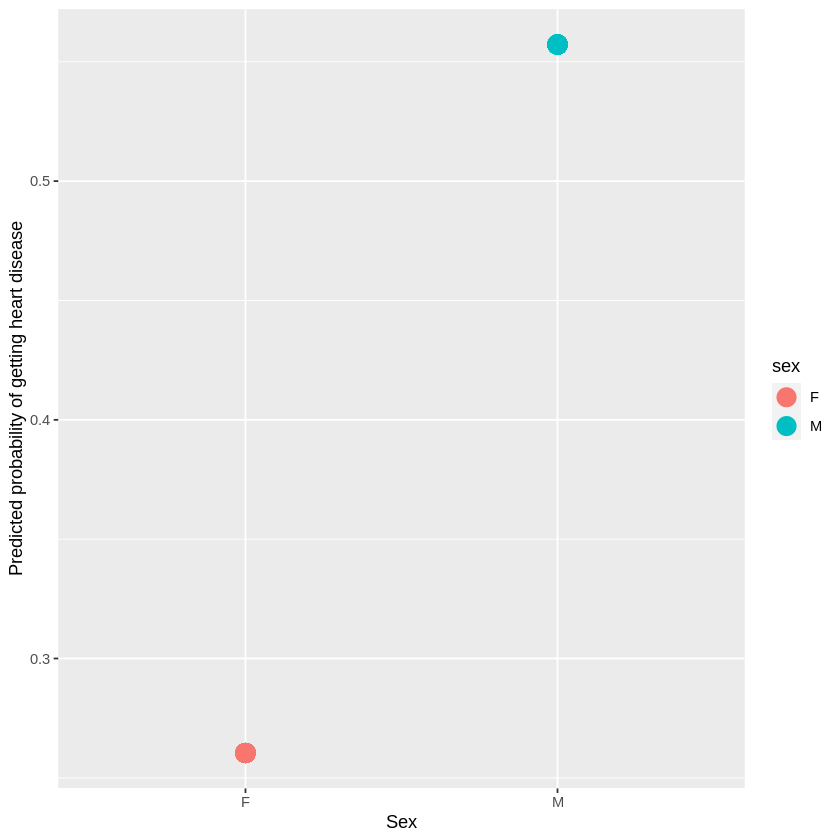

In [ ]:
# Now we are ready for logistic regression

logistic <- glm(hd ~ sex, data=data, family="binomial")
summary(logistic)

## Lastly, let's  see what this logistic regression predicts, given
## that a patient is either female or male (and no other data about them).
predicted.data <- data.frame(
  probability.of.hd=logistic$fitted.values,
  sex=data$sex)

## We can plot the data...
ggplot(data=predicted.data, aes(x=sex, y=probability.of.hd)) +
  geom_point(aes(color=sex), size=5) +
  xlab("Sex") +
  ylab("Predicted probability of getting heart disease")

## Since there are only two probabilities (one for females and one for males),
## we can use a table to summarize the predicted probabilities.
xtabs(~ probability.of.hd + sex, data=predicted.data)



Call:
glm(formula = hd ~ ., family = "binomial", data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.253978   2.960399  -2.113 0.034640 *  
age         -0.023508   0.025122  -0.936 0.349402    
sexM         1.670152   0.552486   3.023 0.002503 ** 
cp2          1.448396   0.809136   1.790 0.073446 .  
cp3          0.393353   0.700338   0.562 0.574347    
cp4          2.373287   0.709094   3.347 0.000817 ***
trestbps     0.027720   0.011748   2.359 0.018300 *  
chol         0.004445   0.004091   1.087 0.277253    
fbs1        -0.574079   0.592539  -0.969 0.332622    
restecg1     1.000887   2.638393   0.379 0.704424    
restecg2     0.486408   0.396327   1.227 0.219713    
thalach     -0.019695   0.011717  -1.681 0.092781 .  
exang1       0.653306   0.447445   1.460 0.144267    
oldpeak      0.390679   0.239173   1.633 0.102373    
slope2       1.302289   0.486197   2.679 0.007395 ** 
slope3       0.606760   0.939324   0.646 0.518309    
ca1 

Saving 6.67 x 6.67 in image


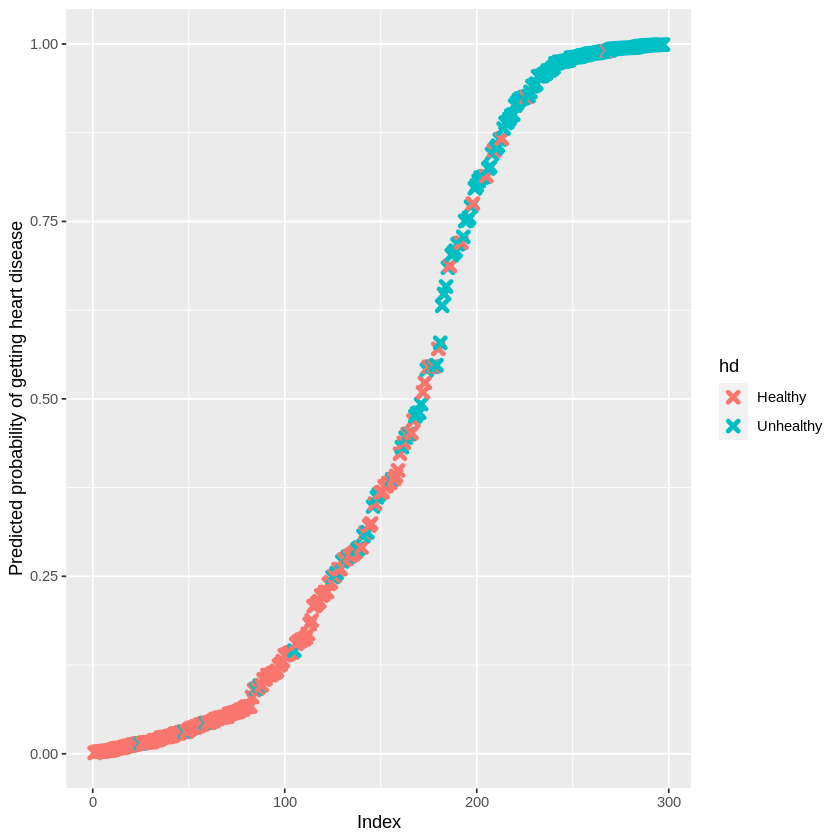

In [ ]:
logistic <- glm(hd ~ ., data=data, family="binomial")
summary(logistic)

## Now calculate the overall "Pseudo R-squared" and its p-value
ll.null <- logistic$null.deviance/-2
ll.proposed <- logistic$deviance/-2

## now we can plot the data
predicted.data <- data.frame(
  probability.of.hd=logistic$fitted.values,
  hd=data$hd)

predicted.data <- predicted.data[
  order(predicted.data$probability.of.hd, decreasing=FALSE),]
predicted.data$rank <- 1:nrow(predicted.data)

## Lastly, we can plot the predicted probabilities for each sample having
## heart disease and color by whether or not they actually had heart disease
ggplot(data=predicted.data, aes(x=rank, y=probability.of.hd)) +
  geom_point(aes(color=hd), alpha=1, shape=4, stroke=2) +
  xlab("Index") +
  ylab("Predicted probability of getting heart disease")

ggsave("heart_disease_probabilities.pdf")

In [ ]:
install.packages('Boruta')
library(Boruta)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppEigen’, ‘ranger’




In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Implementing Random Forest on Custom Dataset

In [ ]:
# Load required libraries
library(randomForest)
library(caret)
library(ggplot2)

# Load the Titanic dataset
titanic <- read.csv("titanic.csv")

# Explore the dataset
head(titanic)
summary(titanic)

# Convert Survived to factor
titanic$Survived <- factor(titanic$Survived)

# Handle missing values
titanic$Age[is.na(titanic$Age)] <- mean(titanic$Age, na.rm = TRUE)
titanic$Fare[is.na(titanic$Fare)] <- mean(titanic$Fare, na.rm = TRUE)
titanic$Embarked[is.na(titanic$Embarked)] <- "Unknown"





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

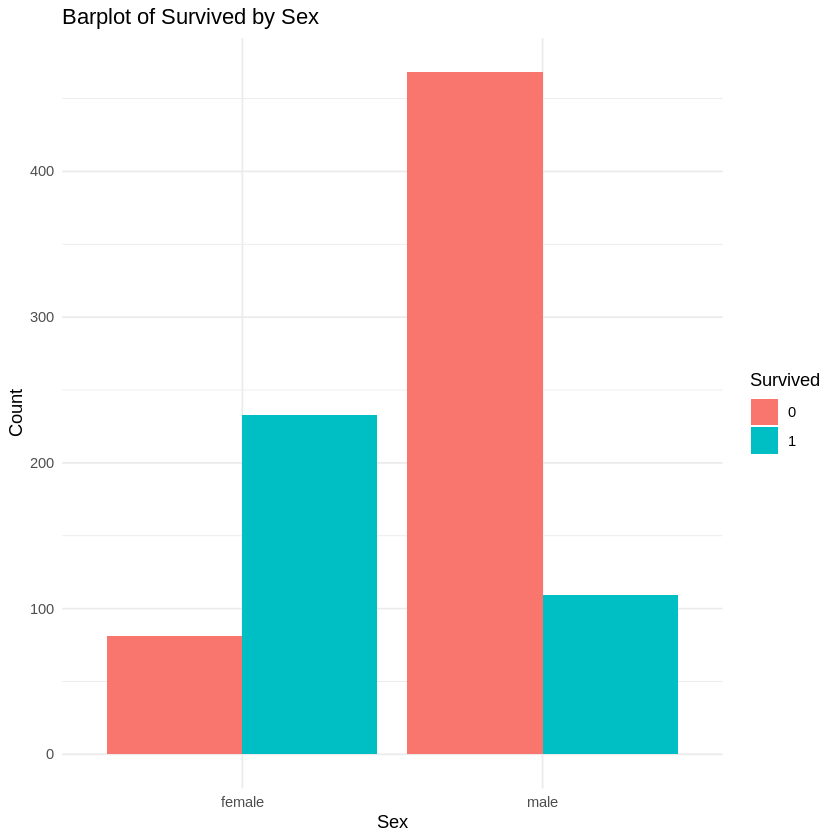

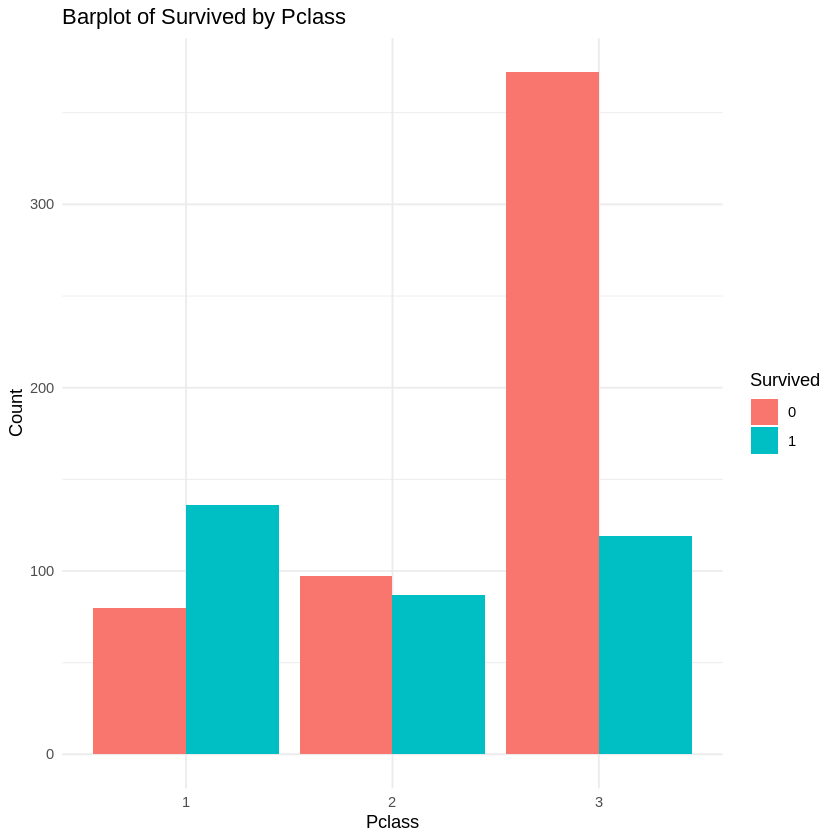

In [ ]:
# Data Visualization
# Barplot of Survived by Sex
ggplot(titanic, aes(x = Sex, fill = Survived)) +
  geom_bar(position = "dodge") +
  labs(x = "Sex", y = "Count", fill = "Survived", title = "Barplot of Survived by Sex") +
  theme_minimal()

# Barplot of Survived by Pclass
ggplot(titanic, aes(x = factor(Pclass), fill = Survived)) +
  geom_bar(position = "dodge") +
  labs(x = "Pclass", y = "Count", fill = "Survived", title = "Barplot of Survived by Pclass") +
  theme_minimal()






In [ ]:
# Perform feature selection using caret package (wrapper method)
set.seed(123)

# rfe stands for recursive feature elimination
ctrl <- rfeControl(functions = rfFuncs, method = "cv", number = 10) #cv is cross-validation and number denotes no. of folds.
feature_selection <- rfe(titanic[, -c(1, 4, 9)], titanic$Survived, sizes = c(3:8), rfeControl = ctrl)#excluding PassengerId,Name,Ticket

# Get selected features
selected_features <- feature_selection$optVariables
selected_features

# Subset the data with selected features
titanic_subset <- titanic[, c("Survived", selected_features)]

# Split data into training and testing sets
set.seed(456)
train_index <- createDataPartition(titanic_subset$Survived, p = 0.7, list = FALSE)
train_data <- titanic_subset[train_index, ]
test_data <- titanic_subset[-train_index, ]

# Train Random Forest model
rf_model <- randomForest(Survived ~ ., data = train_data, ntree = 500)

# Predict on test data
predictions <- predict(rf_model, newdata = test_data)

[1] "Survived" "Sex"      "Fare"

[1] 1

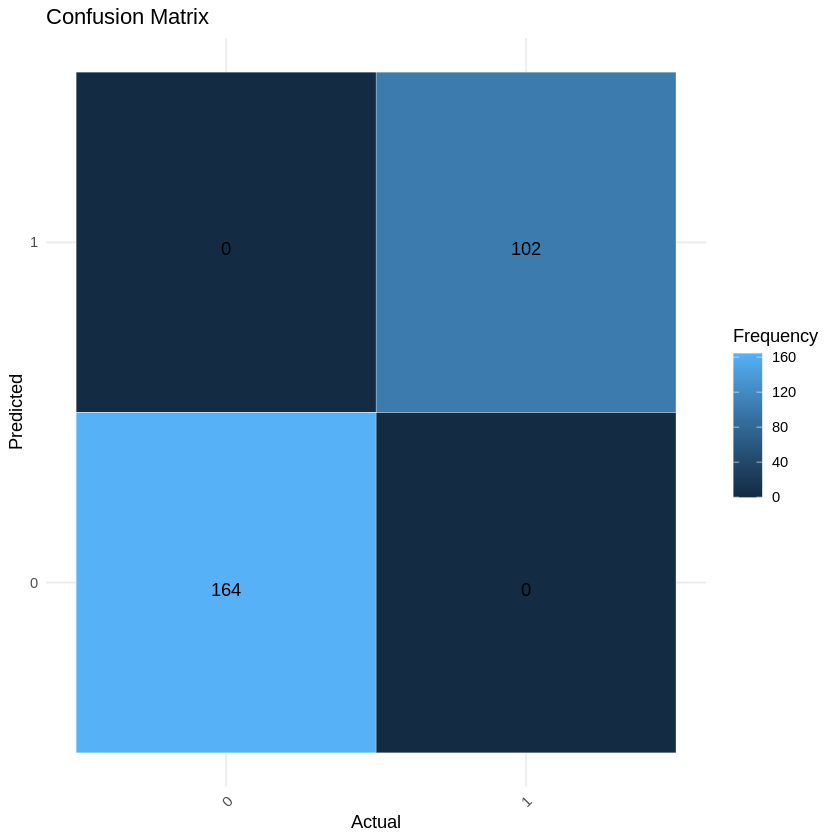

In [ ]:
# Model evaluation
confusion_matrix <- table(test_data$Survived, predictions)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
accuracy

# Data Visualization of model performance
# Confusion Matrix
# Data Visualization of model performance
# Confusion Matrix
confusion_matrix <- as.data.frame(confusion_matrix)
colnames(confusion_matrix) <- c("Actual", "Predicted", "Frequency")

confusion_matrix_plot <- ggplot(confusion_matrix, aes(x = Actual, y = Predicted, fill = Frequency)) +
  geom_tile(color = "white") +
  geom_text(aes(label = sprintf("%1.0f", Frequency)), vjust = 1) +
  labs(x = "Actual", y = "Predicted", fill = "Frequency", title = "Confusion Matrix") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

print(confusion_matrix_plot)